# Mercedes-Benz Greener Manufacturing

# 1. BUSINESS PROBLEM

### 1.1 DESCRIPTION

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

### 1.2 SOURCES

DATA SOURCE: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

RESEARCH PAPER: https://medium.com/@williamkoehrsen/capstone-project-mercedes-benz-greener-manufacturing-competition-4798153e2476


### 1.3 Real World / Business Objectives and Constraints







1. Accurately predict the time taken on the test bench.

2. Incorrect prediction could affect production line.

3. No strict latency contraints.


# 2. Machine Learning Overview



### 2.1 DATA OVERVIEW

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

File descriptions
Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
sample_submission.csv - a sample submission file in the correct format

### 2.2 TYPE OF PROBLEM

This is a regression problem since we need to predict the time in seconds as to how long the vehicle stays on the text bench.

### 2.3 PERFOMANCE METRICS

The metric to be optimized for is the coefficient of determination.
The coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

# 3. Exploratory Data Analysis

In [1]:
!pip3 install --force-reinstall mlxtend==0.16.0

  Using cached https://files.pythonhosted.org/packages/c0/ca/54fe0ae783ce81a467710d1c5fb41cfca075121139b48327b807020dc40c/mlxtend-0.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d8/69/987bc87788077f933213f4c2cded964f3b345fb14c0ec7ce943ce0800acf/pandas-0.25.2-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/9a/50fadfd53ec909e4399b67c74cc7f4e883488035cfcdb90b685758fa8b34/setuptools-41.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/f8/82a8a6ed446b58aa718b2744b265983783a2c84098a73db6d0b78a573e25/numpy-1.17.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/89/61/465fb3bfba684b0f53b5c4829c3c89e86e6fe9fdcdfda93e38f1788090f0/matplotlib-3.0.3-cp35-cp35m-manylinux1_x86_64.whl
  Usi

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlxtend
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from prettytable import PrettyTable
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import StratifiedKFold
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data

In [54]:
train_df=pd.read_csv("train.csv")

In [92]:
test_df=pd.read_csv("test.csv")

In [36]:
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)


Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [37]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


We can see that the data consists of 4208 rows with each row having a y value which is the time in seconds.

In [39]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.1 Analysis of 'y'

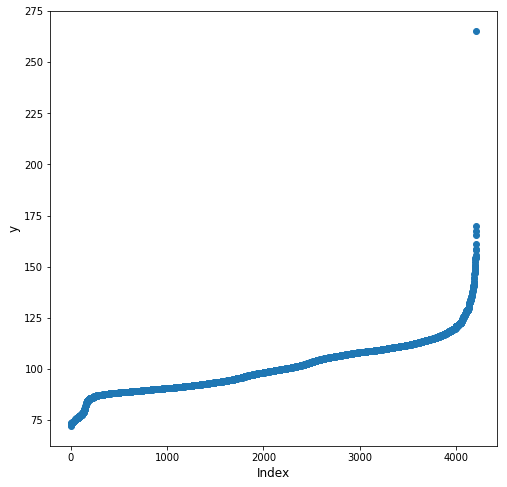

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

We can see that the mean value of y is 100.66 seconds. We can see that there is one outlier and all the other values are less than 180.

In [41]:
train_df[train_df.y >= 180]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168


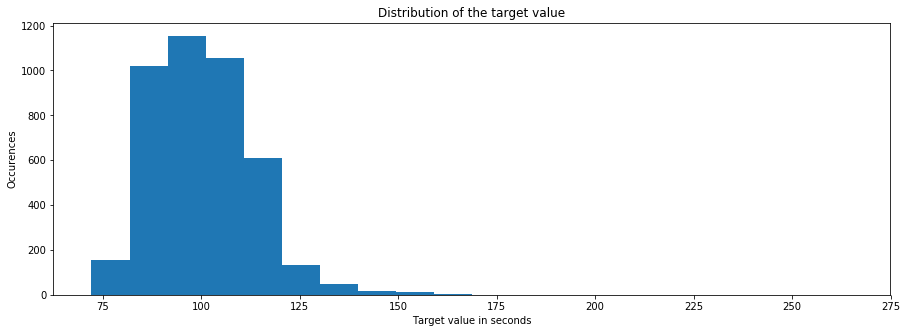

In [42]:
y_train = train_df['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))

## 3.2 Analysis of Features


In [43]:
data_type = train_df.dtypes.reset_index()
data_type.columns = ["Count", "Column Type"]
data_type.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


We can see that there are 378 columns of which 369 are integers and 8 are objects. Also there are a few features which consist of all 0 or 1 values which do not add any value to the model.

In [44]:
data_type.iloc[:15,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0 to X8 are the categorical objects while the others are binary.

In [60]:
no_variation = []
for feature in train_df:
    if max(train_df[feature]) == min(train_df[feature]):
        print(feature)
        no_variation.append(feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


# 4. Data Cleaning

Convert categorical variable to dummy variable

In [93]:
train_df=pd.get_dummies(train_df)
test_df=pd.get_dummies(test_df)

Removing Outliers

In [57]:
train_df = train_df[train_df.y < 180]


Drop features with no Variation and ID column.

In [61]:
train_df = train_df.drop(no_variation,1)

In [94]:
del train_df['ID']
del test_df['ID']


In [50]:
train_df.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Save target y values in an array

In [63]:
y=np.array(train_df['y'])

In [52]:
train_df, test_df=train_df.align(test_df, join='inner',axis=1)

In [53]:
test_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Machine Learning Models

## 5.1 Baseline Linear Regression Model

In [64]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)


In [55]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred=regressor.predict(x_test)

In [57]:
r2_score(y_test,y_pred)

-2.273738906805264e+23

Lets try to add PCA as well to help improve performance

In [58]:
pca = PCA(n_components=140, random_state=42)
pca2_results_train = pca.fit_transform(train_df)
pca2_results_test = pca.transform(test_df)


In [59]:
for i in range(1, 140+1):
    train_df['pca_' + str(i)] = pca2_results_train[:,i-1]
    test_df['pca_' + str(i)] = pca2_results_test[:, i-1]

In [60]:
train_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140
0,0,0,1,0,0,0,0,1,0,0,...,0.547548,-0.294746,0.266133,0.111302,-0.062792,-0.169481,0.014283,-0.472926,0.120114,-0.011677
1,0,0,0,0,0,0,0,1,0,0,...,0.009837,0.072340,-0.095669,0.093936,0.085435,-0.342695,0.278186,0.145561,0.371188,0.511744
2,0,0,0,0,0,0,1,0,0,0,...,-0.653037,-0.069716,0.112751,-0.032921,-0.038133,-0.206149,-0.595703,-0.569718,0.354165,0.057655
3,0,0,0,0,0,0,0,0,0,0,...,0.094094,-0.227754,0.115279,0.036104,-0.239833,-0.119930,-0.030907,-0.182453,-0.222312,0.306198
4,0,0,0,0,0,0,0,0,0,0,...,0.227805,-0.035984,0.106756,-0.036217,-0.091140,-0.019108,-0.193708,-0.211739,0.176596,0.041106


Repeat the above experiment.

In [61]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)


In [62]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred=regressor.predict(x_test)

In [64]:
r2_score(y_test,y_pred)

-3.3769758800474546e+22

https://www.kaggle.com/frednavruzov/baselines-to-start-with-lb-0-56?scriptVersionId=1208832
ICA is also an useful feature to boost performance.


In [65]:
ica = FastICA(n_components=140, random_state=42)
ica2_results_train = ica.fit_transform(train_df)
ica2_results_test = ica.transform(test_df)

In [66]:
train_df['ica_' + str(i)] = ica2_results_train[:,i-1]
test_df['ica_' + str(i)] = ica2_results_test[:, i-1]

In [67]:
train_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,ica_140
0,0,0,1,0,0,0,0,1,0,0,...,-0.294746,0.266133,0.111302,-0.062792,-0.169481,0.014283,-0.472926,0.120114,-0.011677,-0.000208
1,0,0,0,0,0,0,0,1,0,0,...,0.072340,-0.095669,0.093936,0.085435,-0.342695,0.278186,0.145561,0.371188,0.511744,0.020266
2,0,0,0,0,0,0,1,0,0,0,...,-0.069716,0.112751,-0.032921,-0.038133,-0.206149,-0.595703,-0.569718,0.354165,0.057655,-0.006069
3,0,0,0,0,0,0,0,0,0,0,...,-0.227754,0.115279,0.036104,-0.239833,-0.119930,-0.030907,-0.182453,-0.222312,0.306198,-0.000946
4,0,0,0,0,0,0,0,0,0,0,...,-0.035984,0.106756,-0.036217,-0.091140,-0.019108,-0.193708,-0.211739,0.176596,0.041106,-0.002924


Lets try a Linear Regressor model with the engineered features.

In [68]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)


In [69]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred=regressor.predict(x_test)

In [71]:
r2_score(y_test,y_pred)

-2.379771955112134e+22

We can observe a significant improvement with these features.

In [73]:
import pickle
train_df.to_pickle('train_df.pickle')
pd.DataFrame(y).to_csv("labels.csv",index=False)
test_df.to_pickle('test_df.pickle')



## 5.2 SGD Regressor

In [3]:
import pickle
train_df=pd.read_pickle('train_df.pickle')
y=pd.read_csv("labels.csv")
test_df=pd.read_pickle('test_df.pickle')


In [75]:
y.head()

,0
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


In [4]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [22]:
regressor=SGDRegressor()

In [23]:
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 216 | elapsed:   28.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   42.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
           

In [24]:
print (clf.best_params_)

{'penalty': 'l2', 'loss': 'epsilon_insensitive', 'alpha': 0.001, 'learning_rate': 'constant'}


In [25]:
regressor = SGDRegressor(alpha =0.001 , loss='epsilon_insensitive', penalty="l2", learning_rate= 'constant' )

regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)


In [26]:
r2_score(y_test,y_pred)

0.5437364331529582

## 5.3 KNN Regressor

In [75]:
import pickle
train_df=pd.read_pickle('train_df.pickle')
y=pd.read_csv("labels.csv")
test_df=pd.read_pickle('test_df.pickle')


In [76]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [93]:
rmse_val=[]
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, n_jobs=-1)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 11.423217777592235
RMSE value for k=  2 is: 10.15514260014187
RMSE value for k=  3 is: 9.939645194643909
RMSE value for k=  4 is: 9.586655936546617
RMSE value for k=  5 is: 9.38867481080732
RMSE value for k=  6 is: 9.282406792478184
RMSE value for k=  7 is: 9.249977652398808
RMSE value for k=  8 is: 9.243881653085783
RMSE value for k=  9 is: 9.185255325065578
RMSE value for k=  10 is: 9.170845979505378
RMSE value for k=  11 is: 9.195320729327923
RMSE value for k=  12 is: 9.183902697021049
RMSE value for k=  13 is: 9.19600947808431
RMSE value for k=  14 is: 9.178025428385684
RMSE value for k=  15 is: 9.1584640883524
RMSE value for k=  16 is: 9.138762061691319
RMSE value for k=  17 is: 9.158982465831066
RMSE value for k=  18 is: 9.154543398137204
RMSE value for k=  19 is: 9.133658164606384
RMSE value for k=  20 is: 9.136809980152835
RMSE value for k=  21 is: 9.130118266611916
RMSE value for k=  22 is: 9.159315266906978
RMSE value for k=  23 is: 9.183662483073466


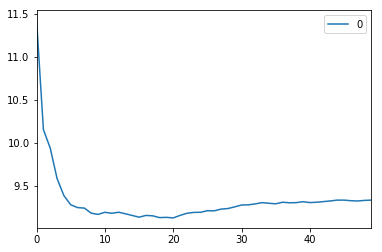

In [94]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

We reach our elbow point when k=20.

In [95]:
model = neighbors.KNeighborsRegressor(n_neighbors = 20, n_jobs=-1)
model.fit(x_train, y_train)  #fit the model
y_pred=model.predict(x_test) 

In [96]:
r2_score(y_test,y_pred)

0.4679711642059091

In [93]:
rmse_val=[]
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, n_jobs=-1)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 11.423217777592235
RMSE value for k=  2 is: 10.15514260014187
RMSE value for k=  3 is: 9.939645194643909
RMSE value for k=  4 is: 9.586655936546617
RMSE value for k=  5 is: 9.38867481080732
RMSE value for k=  6 is: 9.282406792478184
RMSE value for k=  7 is: 9.249977652398808
RMSE value for k=  8 is: 9.243881653085783
RMSE value for k=  9 is: 9.185255325065578
RMSE value for k=  10 is: 9.170845979505378
RMSE value for k=  11 is: 9.195320729327923
RMSE value for k=  12 is: 9.183902697021049
RMSE value for k=  13 is: 9.19600947808431
RMSE value for k=  14 is: 9.178025428385684
RMSE value for k=  15 is: 9.1584640883524
RMSE value for k=  16 is: 9.138762061691319
RMSE value for k=  17 is: 9.158982465831066
RMSE value for k=  18 is: 9.154543398137204
RMSE value for k=  19 is: 9.133658164606384
RMSE value for k=  20 is: 9.136809980152835
RMSE value for k=  21 is: 9.130118266611916
RMSE value for k=  22 is: 9.159315266906978
RMSE value for k=  23 is: 9.183662483073466


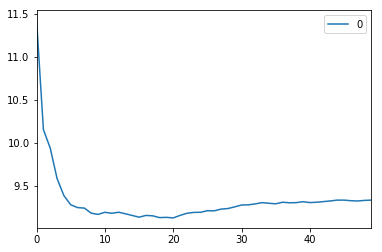

In [94]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

We reach our elbow point when k=20.

In [95]:
model = neighbors.KNeighborsRegressor(n_neighbors = 20, n_jobs=-1)
model.fit(x_train, y_train)  #fit the model
y_pred=model.predict(x_test) 

In [96]:
r2_score(y_test,y_pred)

0.4679711642059091

## 5.4 Linear Regression Models

### Ridge Regressor

In [28]:
regressor = Ridge()  
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'normalize': ['True', 'False']
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.7s finished


{'alpha': 0.1, 'normalize': 'True'}


In [30]:
regressor = Ridge(alpha= 0.1, normalize= 'True')
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [31]:
r2_score(y_test,y_pred)

0.5354907508243725

### Lasso Regressor

In [77]:
regressor = linear_model.Lasso()  
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'normalize': ['True', 'False']
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.6s finished


{'normalize': 'True', 'alpha': 0.01}


In [80]:
regressor = linear_model.Lasso(alpha= 0.01, normalize= 'True')
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [81]:
r2_score(y_test,y_pred)

0.5609292598255868

## 5.5 Decision Tree Regression Models

In [82]:
regressor = DecisionTreeRegressor() 
param_grid = {
    'max_depth': [3, 50],
    'min_samples_split' : np.linspace(0.1, 1.0, 10),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5)
    
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s


{'min_samples_split': 0.4, 'max_depth': 50, 'min_samples_leaf': 0.1}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.2s finished


In [83]:
regressor = DecisionTreeRegressor(max_depth= 50, min_samples_split= 0.4, min_samples_leaf=0.1) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [84]:
r2_score(y_test,y_pred)

0.4428141304492136

## 5.6 Support Vector Regression

In [53]:
regressor = SVR() 
param_grid = {
    'kernel': ['rbf','linear'],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1]
    
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.8min finished


{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [48]:
regressor = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [49]:
r2_score(y_test,y_pred)

0.5269127775904145

## 5.7 XGB Regression

In [107]:
regressor = xgb.XGBRegressor() 
param_grid = {
    'n_estimators': [30,50,60,75,100], 
    'max_depth':[1,2,3,5],
    'learning_rate':10.0 ** -np.arange(1, 5)

}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.0min finished


[14:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 60, 'max_depth': 2, 'learning_rate': 0.1}


In [108]:
regressor = xgb.XGBRegressor(n_estimators= 60, max_depth= 2, learning_rate=0.1) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

[14:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [109]:
r2_score(y_test,y_pred)

0.566196544447676

### Observations

In [115]:
x = PrettyTable()

x.field_names = ["Regressor Used", "r2 Score"]

x.add_row(["Base Linear Regression Model", -2.37])
x.add_row(["SGD Regressor", 0.54])
x.add_row(["KNN Regressor", 0.467])
x.add_row(["Ridge Regressor", 0.53])
x.add_row(["Lasso Regressor", 0.56])
x.add_row(["Decision Tree Regressor", 0.44])
x.add_row(["Support Vector Regressor", 0.526])
x.add_row(["XGB Regressor", 0.566])

print(x)

+------------------------------+----------+
|        Regressor Used        | r2 Score |
+------------------------------+----------+
| Base Linear Regression Model |  -2.37   |
|        SGD Regressor         |   0.54   |
|        KNN Regressor         |  0.467   |
|       Ridge Regressor        |   0.53   |
|       Lasso Regressor        |   0.56   |
|   Decision Tree Regressor    |   0.44   |
|   Support Vector Regressor   |  0.526   |
|        XGB Regressor         |  0.566   |
+------------------------------+----------+


1. We added features of PCA and ICA to our preprocessed data.

2. We tried several different ML regressor models.

3. Linear Lasso regresor worked the best for us with a r2 score of 0.56.

Lets try to further improve the r2 score with some feature engineering if possible.


## 6. Feature Engineering to improve performance

Lets try to incorcporate GRP and SRP to see if it improves performance.

In [10]:
#https://nbviewer.jupyter.org/github/jovsa/mercedes-benz-greener-manufacturing/blob/master/mercedes-benz-greener-manufacturing/notebooks/xgb-5fold-with-feature-eng.ipynb
grp = GaussianRandomProjection(n_components=140, eps=0.1, random_state=42)
grp_results_train = grp.fit_transform(x_train)
grp_results_test = grp.transform(x_test)

# # SRP
srp = SparseRandomProjection(n_components=140, dense_output=True, random_state=42)
srp_results_train = srp.fit_transform(x_train)
srp_results_test = srp.transform(x_test)

for i in range(1, 140+1):
    x_train['grp_' + str(i)] = grp_results_train[:,i-1]
    x_test['grp_' + str(i)] = grp_results_test[:, i-1]
    
    x_train['srp_' + str(i)] = srp_results_train[:,i-1]
    x_test['srp_' + str(i)] = srp_results_test[:, i-1]

In [111]:
x_train.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,grp_136,srp_136,grp_137,srp_137,grp_138,srp_138,grp_139,srp_139,grp_140,srp_140
3830,0,0,0,0,0,0,0,0,0,1,...,-0.809910,-0.218930,-0.674410,0.876364,-0.111975,-0.730458,-0.036009,0.031683,0.478755,0.728133
152,0,0,0,0,0,0,0,0,0,0,...,-1.126888,-0.241439,-0.366262,-0.234665,-0.664250,-0.218271,0.453796,0.254182,0.175664,-0.150897
1557,0,0,0,1,0,0,0,0,0,0,...,0.614183,0.047490,0.854856,0.462912,0.602624,0.347911,-0.006537,0.631889,0.594899,0.816477
2358,0,1,0,0,0,0,0,0,0,0,...,0.708187,-0.472972,-0.130035,1.218877,-0.668759,0.214921,0.036374,0.194016,0.030674,0.805619
1316,0,0,0,0,0,0,0,0,0,0,...,-0.345911,-0.066179,0.722259,0.388007,-1.069088,0.873102,-0.747999,0.037046,-0.188299,1.346990


Lets try the top performing models previously to observe any improvement.

## 6.1 Lasso Regressor

In [65]:
regressor = linear_model.Lasso()  
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'normalize': ['True', 'False']
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    6.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.4s finished


{'alpha': 0.01, 'normalize': 'True'}


In [66]:
regressor = linear_model.Lasso(alpha= 0.01, normalize= 'True')
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [67]:
r2_score(y_test,y_pred)

0.5559869736318757

## 6.2 Support Vector Regressor

In [68]:
regressor = SVR() 
param_grid = {
    'kernel': ['rbf','linear'],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1]
    
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.7min finished


{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [69]:
regressor = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [70]:
r2_score(y_test,y_pred)

0.5302678575364022

## 6.3 SGD Regressor

In [72]:
regressor=SGDRegressor()

In [73]:
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   39.5s finished


{'penalty': 'l2', 'loss': 'huber', 'alpha': 0.001, 'learning_rate': 'optimal'}


In [92]:
regressor = SGDRegressor(alpha =0.001 , loss='huber', penalty="l2", learning_rate= 'optimal' )

regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)


In [93]:
r2_score(y_test,y_pred)

0.523286031475242

## 6.4 XGB Regression

In [107]:
regressor = xgb.XGBRegressor() 
param_grid = {
    'n_estimators': [30,50,60,75,100], 
    'max_depth':[1,2,3,5],
    'learning_rate':10.0 ** -np.arange(1, 5)

}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.0min finished


[14:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 60, 'max_depth': 2, 'learning_rate': 0.1}


In [112]:
regressor = xgb.XGBRegressor(n_estimators= 60, max_depth= 2, learning_rate=0.1) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

[14:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
r2_score(y_test,y_pred)

0.5614055957811037

### Observations

In [114]:
x = PrettyTable()

print("Feature Engineered Models")
x.field_names = ["Regressor Used", "r2 Score"]

x.add_row(["Lasso Regressor", 0.55])
x.add_row(["Support Vector Regressor", 0.53])
x.add_row(["SGD Regressor", 0.52])
x.add_row(["XGB Regressor", 0.561])


print(x)

Feature Engineered Models
+--------------------------+----------+
|      Regressor Used      | r2 Score |
+--------------------------+----------+
|     Lasso Regressor      |   0.55   |
| Support Vector Regressor |   0.53   |
|      SGD Regressor       |   0.52   |
|      XGB Regressor       |  0.561   |
+--------------------------+----------+


1. We added extra features such as GRP and SRP.

2. The improve in performance was negligible so we try to ad some more features.

## Feature Engineering based on Combining features

In [5]:
train_df['X314_plus_X315'] = train_df.apply(lambda row: row.X314 + row.X315, axis=1)
test_df['X314_plus_X315'] = test_df.apply(lambda row: row.X314 + row.X315, axis=1)

In [6]:
train_df['X118_plus_X314'] = train_df.apply(lambda row: row.X118 + row.X314, axis=1)
test_df['X118_plus_X314'] = test_df.apply(lambda row: row.X118 + row.X314, axis=1)


We combined 2 features based on the end product having a coorealtion with y.

In [151]:
train_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,ica_140,X314_plus_X315,X300_plus_X170,X10_plus_X29
0,0,0,1,0,0,0,0,1,0,0,...,-0.062792,-0.169481,0.014283,-0.472926,0.120114,-0.011677,-0.000208,0.0,1.0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0.085435,-0.342695,0.278186,0.145561,0.371188,0.511744,0.020266,0.0,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,-0.038133,-0.206149,-0.595703,-0.569718,0.354165,0.057655,-0.006069,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,-0.239833,-0.119930,-0.030907,-0.182453,-0.222312,0.306198,-0.000946,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,-0.091140,-0.019108,-0.193708,-0.211739,0.176596,0.041106,-0.002924,0.0,0.0,1.0


### Lets rerun the previous models with the new features added.

##  Lasso Regressor

In [173]:
regressor = linear_model.Lasso()  
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'normalize': ['True', 'False']
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    5.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.9s finished


{'alpha': 0.01, 'normalize': 'True'}


In [191]:
regressor = linear_model.Lasso(alpha= 0.01, normalize= 'True')
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [192]:
r2_score(y_test,y_pred)

0.561978964563808

##  Support Vector Regressor

In [174]:
regressor = SVR() 
param_grid = {
    'kernel': ['rbf','linear'],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1]
    
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.6min finished


{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [193]:
regressor = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

In [194]:
r2_score(y_test,y_pred)

0.5277247152246309

## SGD Regressor

In [197]:
regressor=SGDRegressor()

In [198]:
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 185 out of 216 | elapsed:   34.0s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   47.0s finished


{'penalty': 'l2', 'loss': 'huber', 'alpha': 0.0001, 'learning_rate': 'optimal'}


In [199]:
regressor = SGDRegressor(alpha =0.0001 , loss='huber', penalty="l2", learning_rate= 'optimal' )

regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)


In [200]:
r2_score(y_test,y_pred)

0.5441650745213811

##  XGB Regression

In [177]:
regressor = xgb.XGBRegressor() 
param_grid = {
    'n_estimators': [30,50,60,75,100], 
    'max_depth':[1,2,3,5],
    'learning_rate':10.0 ** -np.arange(1, 5)

}
clf = GridSearchCV(regressor, param_grid, verbose=1,n_jobs=-1)
clf.fit(x_train, y_train)
print (clf.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.9min finished


[16:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}


In [213]:
regressor = xgb.XGBRegressor(n_estimators= 50, max_depth= 2, learning_rate=0.1) 
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test) 

[16:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [214]:
r2_score(y_test,y_pred)

0.5613813759288654

### Observations

In [234]:
x = PrettyTable()

print("Feature Engineered Models")
x.field_names = ["Regressor Used", "r2 Score"]

x.add_row(["Lasso Regressor", 0.561])
x.add_row(["Support Vector Regressor", 0.527])
x.add_row(["SGD Regressor", 0.544])
x.add_row(["XGB Regressor", 0.561])


print(x)

Feature Engineered Models
+--------------------------+----------+
|      Regressor Used      | r2 Score |
+--------------------------+----------+
|     Lasso Regressor      |  0.561   |
| Support Vector Regressor |  0.527   |
|      SGD Regressor       |  0.544   |
|      XGB Regressor       |  0.561   |
+--------------------------+----------+


## 7. Stacking Models

### 7.1 XBG Regressor as Meta Regressor

In [29]:
#http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/

lr = linear_model.Lasso(alpha= 0.01, normalize= 'True')
sgd = SGDRegressor(alpha =0.0001 , loss='huber', penalty="l2", learning_rate= 'optimal' )
svr = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
xgb = xgb.XGBRegressor(n_estimators= 50, max_depth= 2, learning_rate=0.1) 

stregr = StackingRegressor(regressors=[lr, sgd, svr], 
                           meta_regressor=xgb)


In [30]:
stregr.fit(x_train, y_train)
y_pred=stregr.predict(x_test)

[16:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
r2_score(y_test,y_pred)

0.5687538035261528

### 7.2 SVR Regressor as Meta Regressor

In [39]:
#http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/

lr = linear_model.Lasso(alpha= 0.01, normalize= 'True')
sgd = SGDRegressor(alpha =0.0001 , loss='huber', penalty="l2", learning_rate= 'optimal' )
svr = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
xgb = xgb.XGBRegressor(n_estimators= 50, max_depth= 2, learning_rate=0.1) 

stregr = StackingRegressor(regressors=[lr, xgb, sgd], 
                           meta_regressor=svr)


In [40]:
stregr.fit(x_train, y_train)
y_pred=stregr.predict(x_test)

[16:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
r2_score(y_test,y_pred)

0.5293541254864508

### 7.3 Linear Regressor Regressor as Meta Regressor

In [7]:
#http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/

lr = linear_model.Lasso(alpha= 0.01, normalize= 'True')
sgd = SGDRegressor(alpha =0.0001 , loss='huber', penalty="l2", learning_rate= 'optimal' )
svr = SVR(kernel= "linear", C= 0.1, gamma=0.001) 
xgb = xgb.XGBRegressor(n_estimators= 50, max_depth= 2, learning_rate=0.1) 

stregr = StackingRegressor(regressors=[svr, xgb, sgd], 
                           meta_regressor=lr)


In [8]:
stregr.fit(x_train, y_train)
y_pred=stregr.predict(x_test)

[06:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
r2_score(y_test,y_pred)

0.5725816674474449

### Observations

In [10]:
x = PrettyTable()

print("Stacked Models")
x.field_names = ["Meta Regressor Used", "r2 Score"]

x.add_row(["Lasso Regressor", 0.5725])
x.add_row(["Support Vector Regressor", 0.5293])
x.add_row(["XGB Regressor", 0.5687])


print(x)

Stacked Models
+--------------------------+----------+
|   Meta Regressor Used    | r2 Score |
+--------------------------+----------+
|     Lasso Regressor      |  0.5725  |
| Support Vector Regressor |  0.5293  |
|      XGB Regressor       |  0.5687  |
+--------------------------+----------+


Using stacked models with Lasso regressor as the meta regressor, gave us the best performond model so fat with a r2 score of 0.5725.

## CONCLUSION

1. The data consists of 4209 rows with 377 features.

2. We separated the y label into a different data set and used the train data to train our models.

3. We tried different regression models before and after adding a few engineered features.

4. The stacked model with a lasso regressor as the meta regressor gave us the best performance with a r2 score of 0.5725.